In [ ]:
# Importing copy, a module for shallow and deep copy operations.
import copy
# Importing json, a lightweight data interchange format inspired by JavaScript object literal syntax. It's used for reading and writing JSON data.
import json
# Importing the os module, which provides a portable way of using operating system dependent functionality.
import os
# Importing random, a module that implements pseudo-random number generators for various distributions.
import random

# Importing cv2 (OpenCV library) for real-time computer vision.
import cv2
# Importing matplotlib's pyplot to create static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
# Importing numpy, a fundamental package for scientific computing with Python. It provides support for arrays, matrices, and high-level mathematical functions.
import numpy as np
# Importing seaborn, a Python visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
# Importing PyTorch, a deep learning library used for applications such as computer vision and natural language processing.
import torch
# Importing nn from torch, which is a module to help create and train neural networks with PyTorch.
import torch.nn as nn
# Importing torchvision again (note: this is redundant as it was already imported previously).
import torchvision
# From PIL (Python Imaging Library), importing Image to support opening, manipulating, and saving many different image file formats.
from PIL import Image
# From skimage, importing exposure to adjust image contrast.
from skimage import exposure
# From skimage, importing io and color. The skimage (Scikit-Image) library is for image processing in Python.
# io is used for reading and writing images, color for color space conversions.
from skimage import io
# From skimage.feature, importing hog for Histogram of Oriented Gradients, a feature descriptor used for object detection.
from skimage.feature import hog
# From torch, importing optim. It provides various optimization algorithms for building neural networks.
from torch import optim
# From torch.autograd, importing Variable. It wraps a tensor and records operations applied to it, allowing automatic differentiation.
from torch.autograd import Variable
# From torchvision, importing datasets and transforms. torchvision is a library that offers access to popular datasets, model architectures, and image transformations for computer vision.
from torchvision import datasets
# From torchvision, importing models. It provides pre-trained models that can be used for implementing and training deep learning algorithms.
from torchvision import models
# Importing transforms and utils from torchvision (note: transforms was already imported previously). 
# Transforms are common image transformations. Utils provide utility functions, e.g., for making grids of images.
from torchvision import transforms, utils
# Importing tqdm for adding progress bars to loops. It provides a quick and extensible progress bar that can add insight into the length of processing time.
from tqdm.auto import tqdm


In [1]:
# Defining the base directory for the dataset. This assumes a folder structure with separate subfolders for training, validation, and test images.
data_dir = '../data/plantnet_300K'
# Constructing paths to the training, validation, and testing directories using os.path.join for compatibility across operating systems.
train_dir = os.path.join(data_dir, 'images_train')
val_dir = os.path.join(data_dir, 'images_val')
test_dir = os.path.join(data_dir, 'images_test')

# Defining image transformations for preprocessing. This is crucial for preparing images for neural network processing.
# Different transformations are defined for training, validation, and testing to simulate different conditions and to prevent overfitting.
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((256, 256)),  # Resizing images to 256x256 pixels.
        transforms.RandomRotation(10),  # Randomly rotating images by up to 10 degrees to introduce variability.
        transforms.RandomHorizontalFlip(),
        # Randomly flipping images horizontally to further increase data variability.
        transforms.ToTensor(),  # Converting images to PyTorch tensors.
    ]),
    'val': transforms.Compose([
        transforms.Resize((256, 256)),  # Resizing validation images to 256x256 pixels.
        transforms.ToTensor(),  # Converting images to tensors.
    ]),
    'test': transforms.Compose([
        transforms.Resize((256, 256)),  # Resizing test images to 256x256 pixels.
        transforms.ToTensor(),  # Converting images to tensors for testing.
    ])
}

# Creating datasets using the ImageFolder class, which is designed to handle data organized in a directory where each subdirectory contains images of one class.
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, data_transforms['val']),
    'test': datasets.ImageFolder(test_dir, data_transforms['test'])
}

# Setting up DataLoader instances for each dataset (train, val, test). 
# DataLoaders are used to load the datasets and provide useful features like batching, shuffling, and parallel data loading.
batch_size = 32  # Defining the batch size to be used for loading images.
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    # Training data loader with shuffling to minimize overfitting.
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False),
    # Validation data loader without shuffling.
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False)
    # Test data loader without shuffling.
}

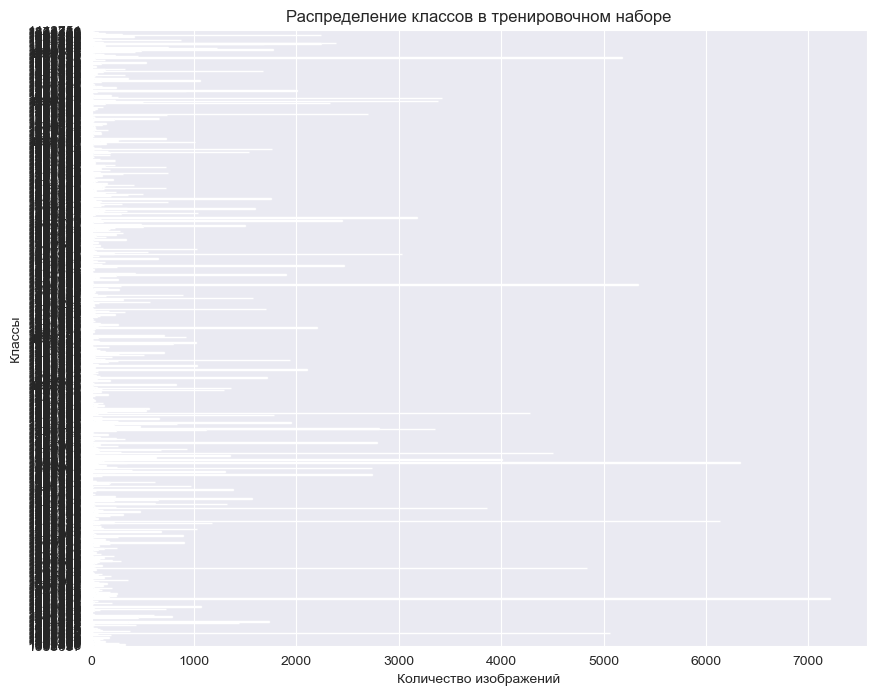

In [2]:
# Counting the number of images in each class by iterating through each class directory within the training directory.
# This creates a dictionary where keys are class names and values are the number of images in that class.
class_counts = {class_: len(os.listdir(os.path.join(train_dir, class_)))
                for class_ in os.listdir(train_dir)}

# Initiating a figure with specific dimensions (width and height) for better visualization of the data.
plt.figure(figsize=(10, 8))

# Using seaborn to create a bar plot. The x-axis represents the number of images in each class,
# and the y-axis lists the classes themselves.
sns.barplot(x=list(class_counts.values()), y=list(class_counts.keys()))

# Setting the title of the plot to "Class Distribution in the Training Set" to describe the visualization.
plt.title('Class Distribution in the Training Set')

# Labeling the x-axis as "Number of Images" to indicate what the numerical values represent.
plt.xlabel('Number of Images')

# Labeling the y-axis as "Classes" to indicate that each bar corresponds to a different class.
plt.ylabel('Classes')

# Displaying the plot to show the distribution of classes within the training dataset visually.
plt.show()

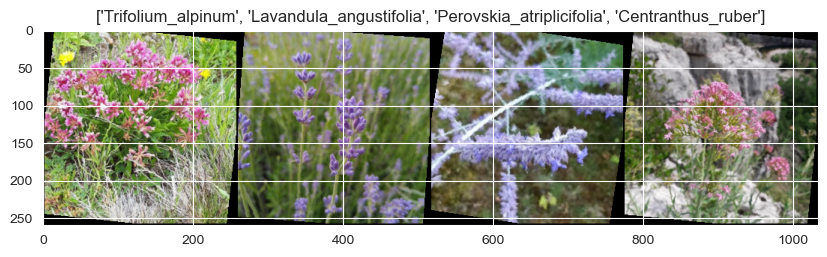

In [3]:
# Loading species names from a JSON file. The file is expected to map class identifiers to their corresponding species names.
with open('../data/plantnet_300K/plantnet300K_species_names.json', 'r') as f:
    species_names = json.load(f)  # Loading the JSON content into the species_names variable.


def imshow(inp, title=None):
    """
    A utility function to display an image. If a title is provided, it will be displayed above the image.
    
    Args:
    - inp: An image tensor.
    - title: Optional. A title to be displayed with the image.
    """
    # The image tensor is converted from PyTorch tensor to NumPy array and then transposed.
    # This changes the tensor format from CxHxW to HxWxC to match the expected input format of plt.imshow.
    inp = inp.numpy().transpose((1, 2, 0))

    # Creating a figure with a specified size.
    plt.figure(figsize=(10, 10))
    # Displaying the image.
    plt.imshow(inp)
    # If a title is provided, it is set for the current image.
    if title is not None:
        plt.title(title)
    # A brief pause is inserted to ensure that the plot gets updated.
    plt.pause(0.001)


# Fetching a batch of data (images and their labels) from the training DataLoader.
inputs, classes = next(iter(dataloaders['train']))

# Retrieving the class names for the first four images in the batch. These are numeric class labels.
class_names = [image_datasets['train'].classes[x] for x in classes[:4]]

# Translating numeric class labels into actual species names using the species_names dictionary loaded from the JSON file.
real_names = [species_names[name] for name in class_names]

# Creating a grid of images from the first four images in the batch to visualize them together.
out = torchvision.utils.make_grid(inputs[:4])

# Visualizing the images using the previously defined imshow function, with the real species names as the title.
imshow(out, title=real_names)

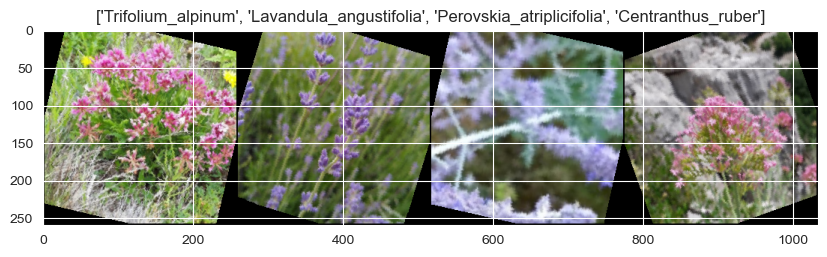

In [4]:
# Setting up a dataset with transformations. This dataset will apply specified transformations to each image in the training directory.
transformed_dataset = datasets.ImageFolder(train_dir, transform=transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256 pixels.
    transforms.RandomRotation(20),  # Apply random rotations to the images within a range of 20 degrees.
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flips to the images.
    transforms.ToTensor()  # Convert the images to PyTorch tensors.
]))


# The imshow function is defined to display a tensor as an image.
def imshow(inp, title=None):
    """Imshow for Tensor."""
    # The tensor is converted to a NumPy array and transposed to fit the image format expected by matplotlib.
    inp = inp.numpy().transpose((1, 2, 0))
    # Creating a figure with a specified size for visualization.
    plt.figure(figsize=(10, 10))
    # Displaying the image.
    plt.imshow(inp)
    # If a title is provided, it will be displayed above the image.
    if title is not None:
        plt.title(title)
    # A pause is included to ensure the plot gets updated.
    plt.pause(0.001)


# Retrieving class names for the first four images in the previously loaded batch.
class_names = [image_datasets['train'].classes[x] for x in classes[:4]]

# Translating the class names into real species names using the loaded species_names dictionary.
real_names = [species_names[name] for name in class_names]

# Defining a set of augmentations to apply. These are similar to the initial transformations but include a random resized crop.
augmentation_transforms = transforms.Compose([
    transforms.RandomResizedCrop(256),  # Apply a random resized crop to 256x256 pixels.
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flips.
    transforms.RandomRotation(20),  # Apply random rotations within 20 degrees.
    transforms.ToTensor(),  # Convert images to PyTorch tensors.
])

# Applying the defined augmentations to the first four images in the batch.
# This is done by converting each tensor image back to a PIL image, applying the augmentations, and then stacking the results into a single tensor.
augmented_images_subset = torch.stack([augmentation_transforms(transforms.ToPILImage()(img)) for img in inputs[:4]])

# Creating a grid of the augmented images for visualization.
augmented_out_subset = utils.make_grid(augmented_images_subset)

# Visualizing the augmented images with their real species names as titles.
imshow(augmented_out_subset, title=real_names)


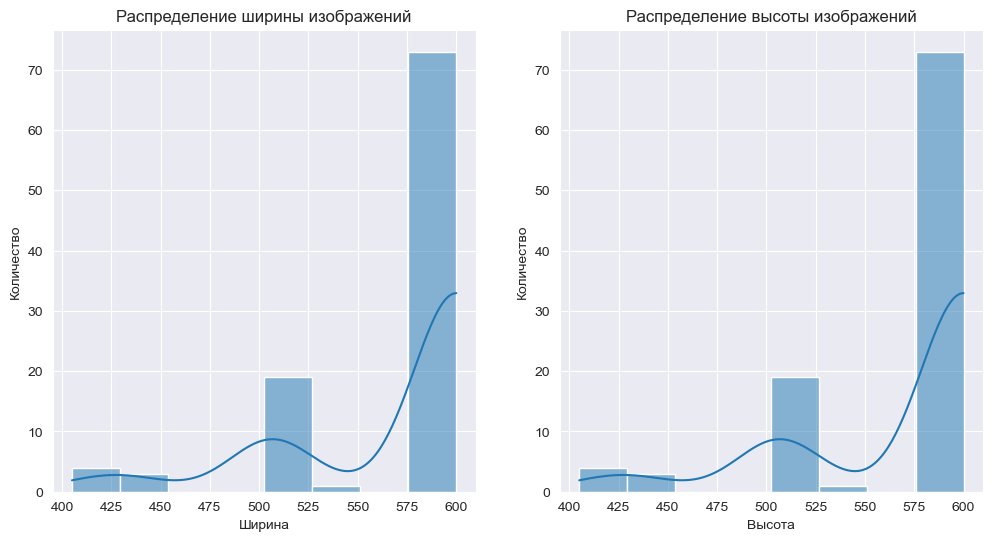

In [5]:
# Selecting a random subset of 100 images from the transformed dataset. 
# The dataset's 'imgs' attribute contains tuples of image file paths and their class labels.
sample_images = random.choices(transformed_dataset.imgs, k=100)

# Collecting the sizes of these sample images by opening each image and retrieving its size.
# The size is a tuple in the form of (width, height).
sizes = [Image.open(img[0]).size for img in sample_images]

# Unpacking the list of sizes into two separate lists: one for widths and one for heights.
widths, heights = zip(*sizes)

# Visualizing the distribution of image widths and heights using histograms.
plt.figure(figsize=(12, 6))

# Creating a histogram for the distribution of image widths.
plt.subplot(1, 2, 1)  # This specifies the first subplot in a 1x2 grid of subplots.
sns.histplot(widths, kde=True)  # Drawing a histogram with a kernel density estimate (KDE) for widths.
plt.title('Distribution of Image Widths')  # Setting the title in English: 'Distribution of Image Widths'.
plt.xlabel('Width')  # Labeling the x-axis as 'Width'.
plt.ylabel('Count')  # Labeling the y-axis as 'Count' to indicate the frequency of each width.

# Creating a histogram for the distribution of image heights.
plt.subplot(1, 2, 2)  # This specifies the second subplot in the 1x2 grid.
sns.histplot(heights, kde=True)  # Drawing a histogram with KDE for heights.
plt.title('Distribution of Image Heights')  # Setting the title in English: 'Distribution of Image Heights'.
plt.xlabel('Height')  # Labeling the x-axis as 'Height'.
plt.ylabel('Count')  # Labeling the y-axis as 'Count', similar to the width distribution plot.

# Displaying the plots to show the distributions.
plt.show()


/var/folders/dh/3pjllwsj4833_h88tmrv7j2c0000gn/T/ipykernel_53586/409026940.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([color[c] for color in average_colors], shade=True, label=color_name)
/var/folders/dh/3pjllwsj4833_h88tmrv7j2c0000gn/T/ipykernel_53586/409026940.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([color[c] for color in average_colors], shade=True, label=color_name)
/var/folders/dh/3pjllwsj4833_h88tmrv7j2c0000gn/T/ipykernel_53586/409026940.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot([color[c] for color in average_colors], shade=True, label=color_name)


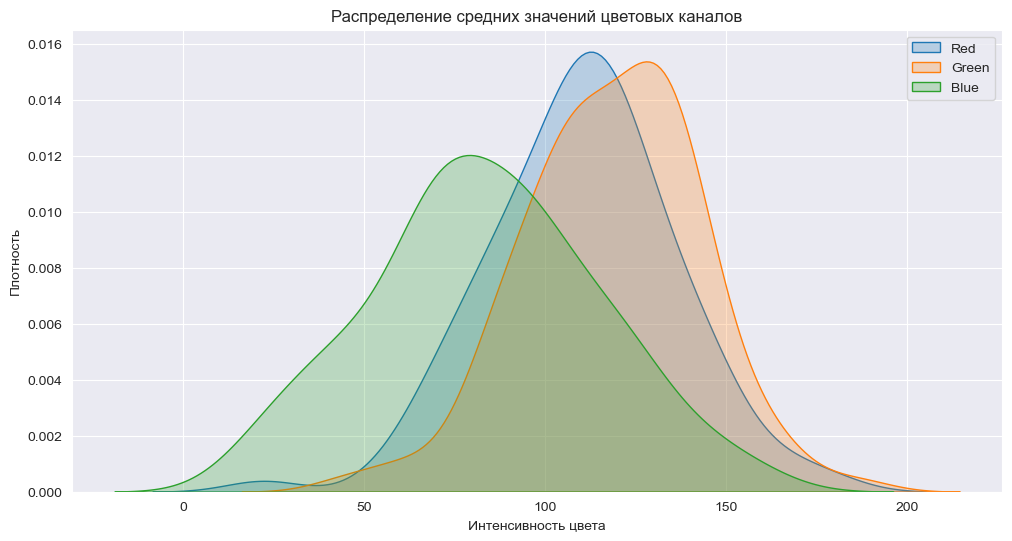

In [6]:
# Selecting a random subset of 100 images from the transformed dataset for analysis.
# The 'imgs' attribute of the dataset contains tuples of image paths and their labels.
sample_images = random.choices(transformed_dataset.imgs, k=100)

# Calculating the average RGB color values for each image in the sample.
# This involves reading each image, then computing the mean across the width and height dimensions (axis=(0, 1)),
# resulting in a single average color value per channel (R, G, B) for each image.
average_colors = [np.mean(io.imread(img[0]), axis=(0, 1)) for img in sample_images]

# Visualizing the distribution of these average color values across the RGB channels.
plt.figure(figsize=(12, 6))

# Iterating through the RGB channels to plot the distribution of each color.
for c, color_name in zip(range(3), ['Red', 'Green', 'Blue']):
    # For each channel, a kernel density estimate plot is generated for the intensity distribution.
    # 'c' iterates over the channels (0 for Red, 1 for Green, 2 for Blue),
    # and 'color_name' provides the label for each plot.
    sns.kdeplot([color[c] for color in average_colors], shade=True, label=color_name)

# Setting the title of the plot to "Distribution of Average Color Channel Values" in English.
plt.title('Distribution of Average Color Channel Values')

# Labeling the x-axis as 'Color Intensity' to indicate the range of average color values.
plt.xlabel('Color Intensity')

# Labeling the y-axis as 'Density' to indicate the density of the distribution for different intensity values.
plt.ylabel('Density')

# Adding a legend to distinguish between the color channels.
plt.legend()

# Displaying the plot to visualize the distributions.
plt.show()

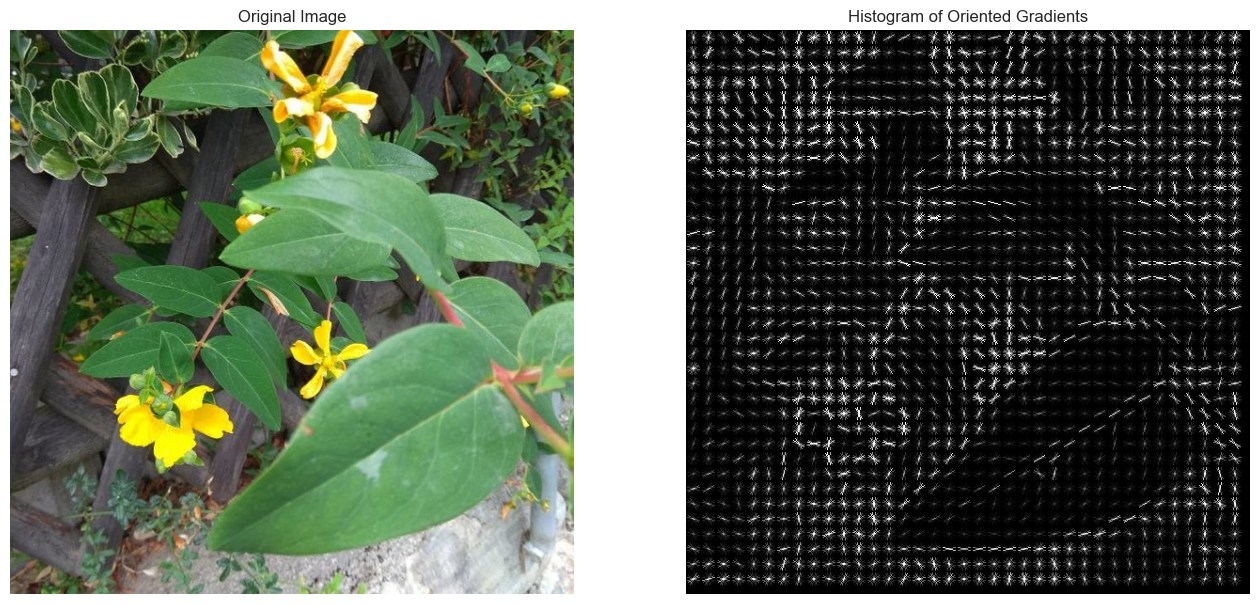

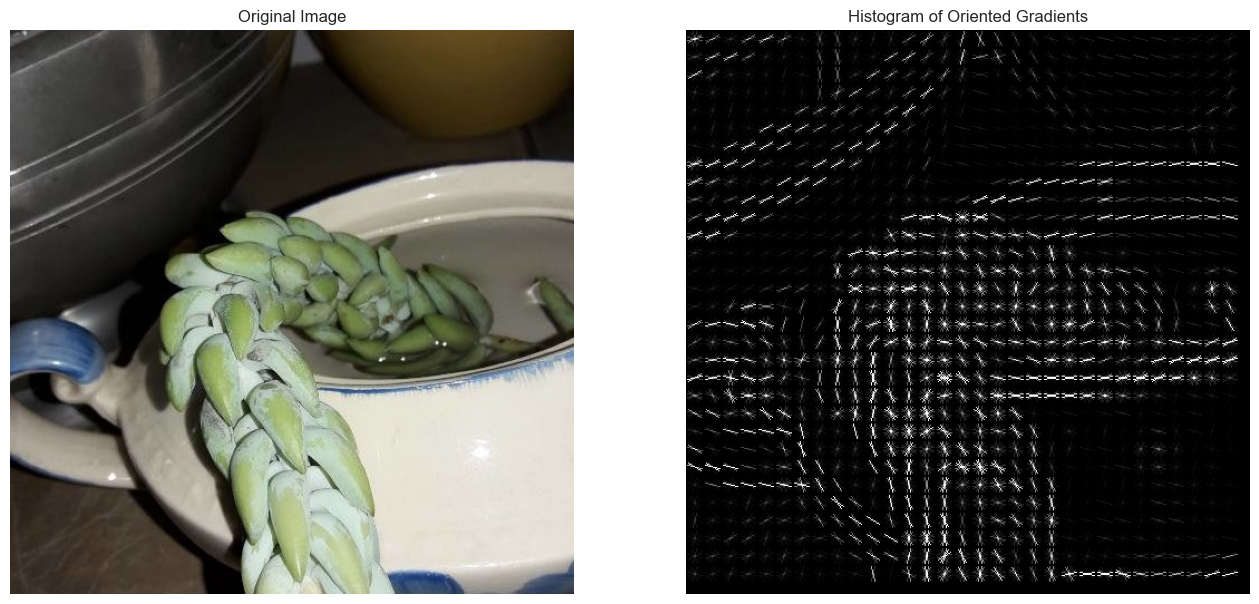

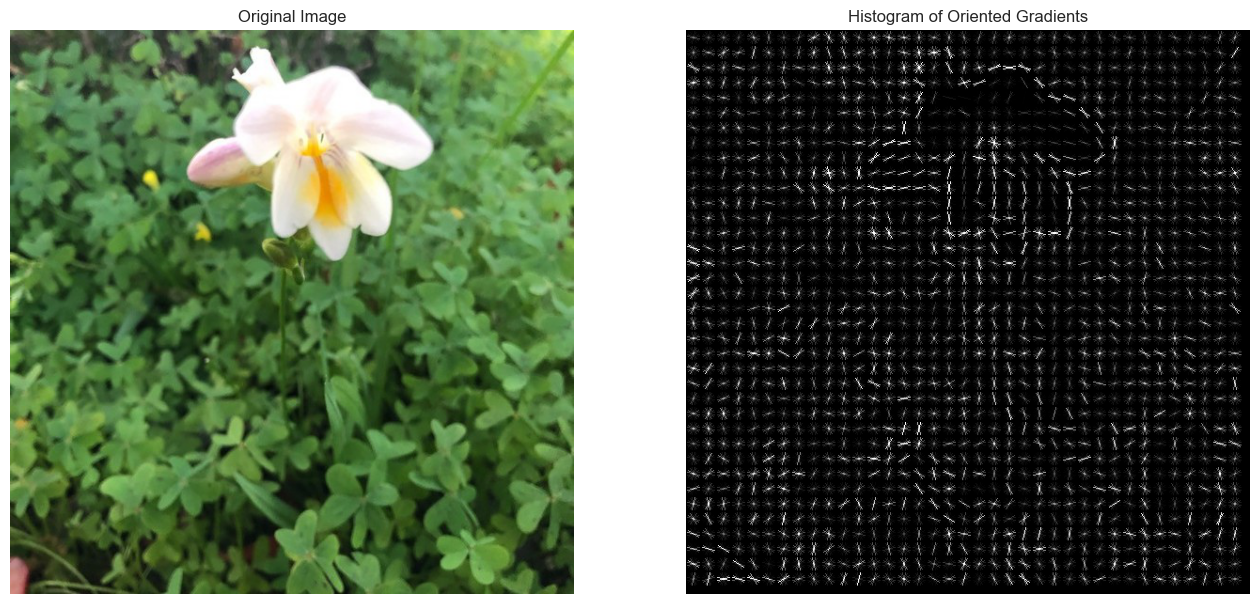

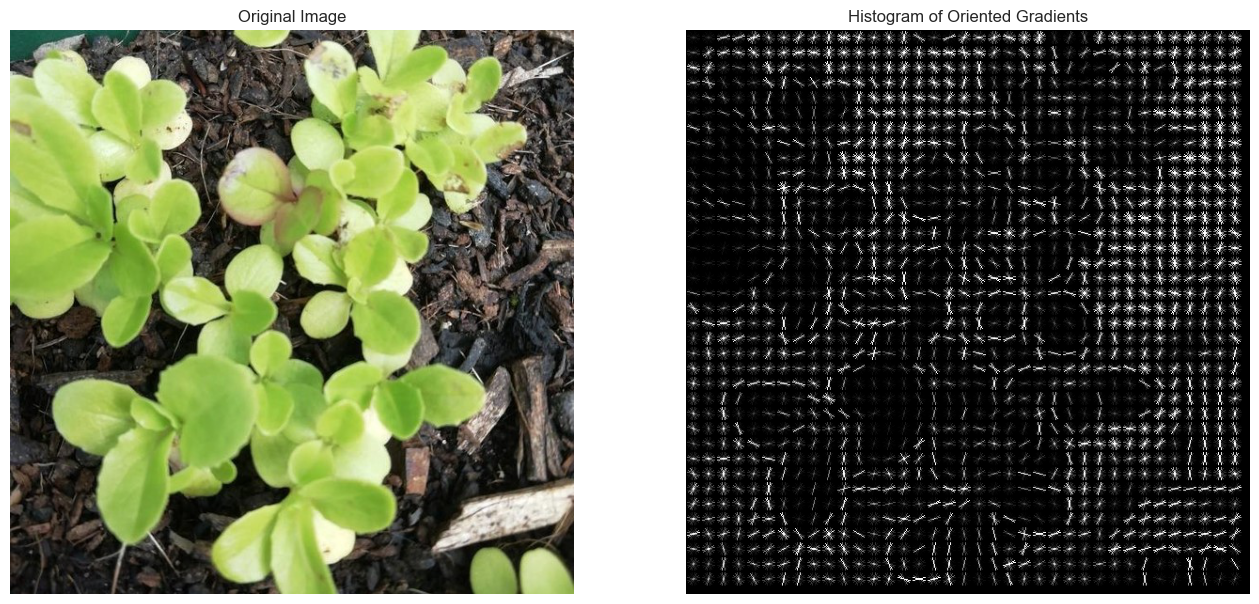

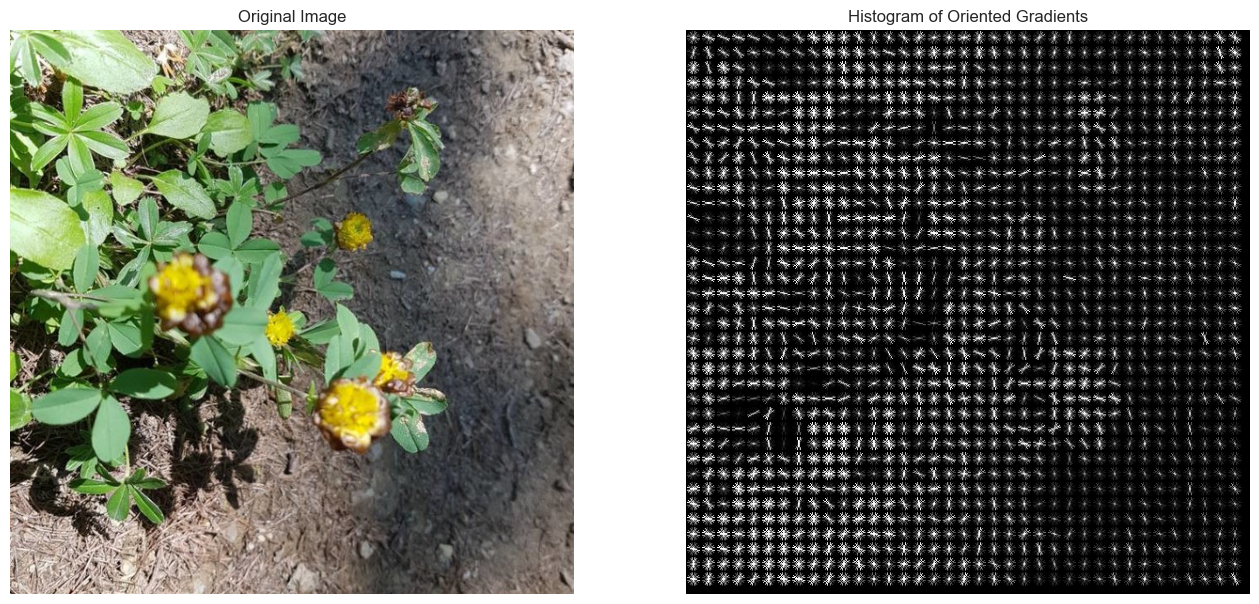

In [7]:
def visualize_hog(img_path):
    """
    Visualizes the Histogram of Oriented Gradients (HOG) for a given image.
    
    Args:
    - img_path (str): The file path to the image for which HOG features are to be visualized.
    """
    # Loading the image from the given file path. The image is read into a NumPy array.
    image = io.imread(img_path)

    # Computing the HOG features of the image. The 'hog' function returns both the feature descriptor
    # ('fd') and an image ('hog_image') that can be used for visualization purposes. The parameters
    # control the granularity of the feature computation.
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    # The HOG visualization image is rescaled to enhance visibility. The intensity values are adjusted
    # to spread across a specified range, improving the contrast of the visualization.
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Setting up a figure with two subplots: one for the original image and one for its HOG visualization.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

    # Displaying the original image in the first subplot.
    ax1.axis('off')
    ax1.imshow(image)
    ax1.set_title('Original Image')

    # Displaying the HOG visualization in the second subplot, using a grayscale color map for clarity.
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()


# Selecting a random subset of 5 images from the transformed dataset for analysis.
sample_images = random.choices(transformed_dataset.imgs, k=5)

# Visualizing the HOG features for each of the selected images using the defined function.
for img_path, _ in sample_images:
    visualize_hog(img_path)

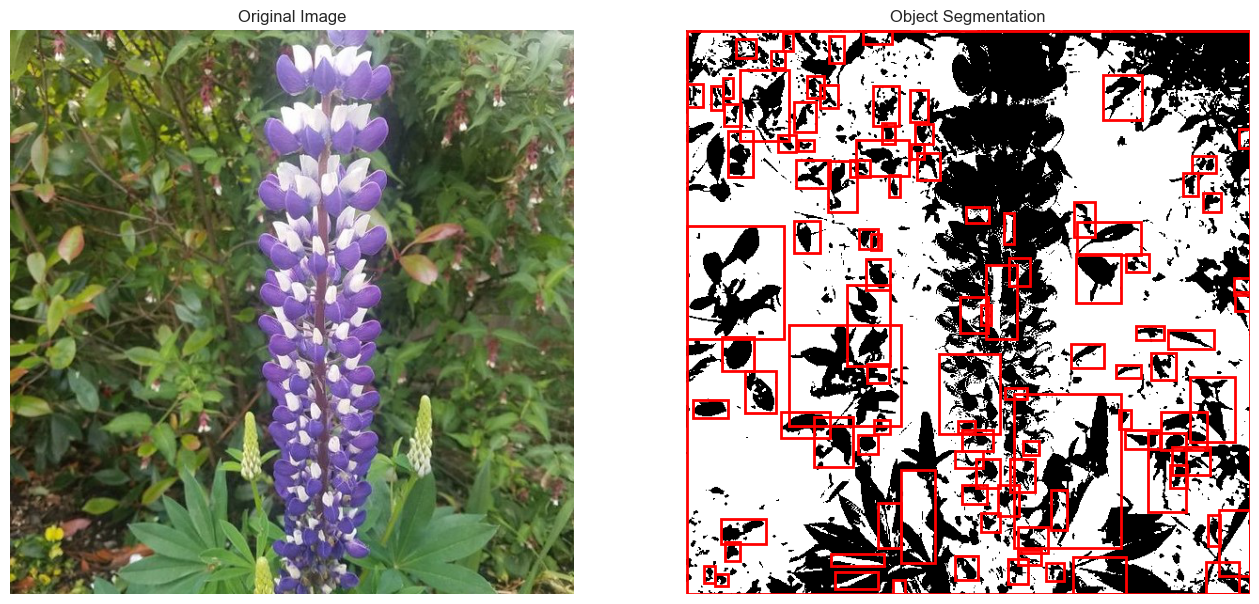

In [8]:
def analyze_object_sizes_with_original(image_path):
    """
    Analyzes object sizes within an image by performing segmentation and then visualizes the
    original image alongside the segmented image with highlighted object boundaries.
    
    Args:
    - image_path (str): The file path to the image to be analyzed.
    """
    # Loading the image from the specified path. The image is read into a NumPy array.
    image = io.imread(image_path)

    # Converting the image to grayscale, which is necessary for thresholding.
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Applying thresholding to segment the object from the background. The function returns
    # a binary image where the object pixels are white and the background pixels are black.
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Finding contours of segmented objects in the binary image. The function identifies the
    # boundary points of the objects.
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Preparing to display the original image and the segmentation result side by side.
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Displaying the original image in the first subplot.
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Displaying the binary (segmented) image in the second subplot. This image shows the segmented
    # objects in white against a black background.
    axes[1].imshow(binary, cmap='gray')
    # Highlighting the boundaries of segmented objects with rectangles. Small objects are filtered out
    # based on their area size to focus on more significant objects.
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:  # Filtering out small objects.
            x, y, w, h = cv2.boundingRect(contour)  # Computing the bounding box for each contour.
            axes[1].add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    axes[1].set_title('Object Segmentation')
    axes[1].axis('off')

    plt.show()


# Selecting a random image from the dataset for analysis.
random_image_path, _ = random.choice(transformed_dataset.imgs)
# Analyzing and visualizing the segmentation of objects within the randomly selected image.
analyze_object_sizes_with_original(random_image_path)

In [10]:
# Counting the unique classes in the training dataset
num_classes = len(image_datasets['train'].classes)
# Printing the number of classes found. The output will show this number, providing insight into the dataset's diversity.
print(f"Number of classes: {num_classes}")

Количество классов: 1081


In [11]:
# Checking for the availability of MPS (Metal Performance Shaders), which allows for GPU acceleration on Apple silicon.
# If MPS is not available, the model will run on the CPU.
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# Printing the device being used. This is useful for verifying that the model will run on the expected hardware (MPS if available, otherwise CPU).
print(f"Using device: {device}")

# Loading a pretrained ResNet-50 model. This model has been trained on a large dataset and can be fine-tuned for specific tasks.
model = models.resnet50(pretrained=True)

# Freezing the weights of the pretrained model. This is done to prevent the weights from being updated during training.
# Freezing is useful when you only want to train the final layer(s) of the model.
for param in model.parameters():
    param.requires_grad = False

# Adapting the last layer of the model to match the number of classes in the dataset.
# This is necessary because the original ResNet-50 model was trained on ImageNet with 1000 classes,
# and we need to adjust it for our specific number of classes.
num_ftrs = model.fc.in_features  # Getting the number of input features to the final layer.
model.fc = nn.Linear(num_ftrs,
                     num_classes)  # Replacing the final layer with a new one that matches our number of classes.

# Transferring the model to the selected device (MPS or CPU). This step ensures that the model computations
# are performed on the correct hardware.
model = model.to(device)

# Defining the loss function and optimizer. CrossEntropyLoss is commonly used for classification tasks.
# The optimizer is set to optimize only the parameters of the final layer, which are the ones we're training.
criterion = nn.CrossEntropyLoss()  # Loss function for classification.
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Optimizer for updating the final layer's weights.

Используемое устройство: mps


/Users/trupolog/anaconda3/envs/trupolog/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/trupolog/anaconda3/envs/trupolog/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
def train_model(model, criterion, optimizer, dataloaders, device, num_epochs=100, patience=5):
    """
    Trains a PyTorch model and implements early stopping based on the accuracy of the validation set.

    Args:
        model (torch.nn.Module): The model to be trained and evaluated.
        criterion: Loss function used to evaluate model performance.
        optimizer: Optimization algorithm used for updating model weights.
        dataloaders (dict): A dictionary containing 'train' and 'val' DataLoader objects for loading data.
        device (torch.device): The device (CPU or MPS) on which the model will be trained.
        num_epochs (int): The maximum number of training epochs.
        patience (int): The number of epochs to wait for improvement on the validation accuracy before stopping the training early.

    Returns:
        torch.nn.Module: The trained model with the best performance on the validation dataset.
    """
    # Initialize variables to keep track of the best model weights and highest validation accuracy observed.
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0

    # Ensure the model uses floating-point representation for its parameters, which is necessary for many computations.
    model = model.float()

    # Main training loop over the specified number of epochs.
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training phase and a validation phase.
        for phase in ['train', 'val']:
            # Set the model to the appropriate mode: 'train' mode enables gradients, 'eval' mode disables them.
            if phase == 'train':
                model.train()
            else:
                model.eval()

            # Initialize variables to keep track of loss and accuracy for each phase.
            running_loss = 0.0
            running_corrects = 0

            # Iterate over batches of data in the current phase ('train' or 'val').
            for inputs, labels in tqdm(dataloaders[phase]):
                # Transfer the input data and labels to the specified device (CPU or GPU).
                inputs = inputs.to(device).float()
                labels = labels.to(device)

                # Reset the gradients of all model parameters to zero.
                optimizer.zero_grad()

                # Forward pass: compute the model output for the input data.
                # Enable gradient computation only in the 'train' phase.
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    # Determine the predicted classes by finding the max logit value for each input.
                    _, preds = torch.max(outputs, 1)
                    # Compute the loss between the model output and the true labels.
                    loss = criterion(outputs, labels)

                    # If in 'train' phase, perform a backward pass and update the model weights.
                    if phase == 'train':
                        loss.backward()  # Compute gradients.
                        optimizer.step()  # Update weights.

                # Aggregate the loss and accuracy metrics for the current batch.
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Compute the average loss and accuracy for the entire phase (train or val).
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Update best model if validation accuracy improves.
            if phase == 'val':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    epochs_no_improve = 0  # Reset counter for epochs with no improvement.
                    # Save the model with the best validation accuracy observed so far.
                    torch.save(model.state_dict(), 'model_best_accuracy.pth')
                    print(f"Best model saved with accuracy: {best_acc:.4f}")
                else:
                    epochs_no_improve += 1  # Increment counter for epochs with no improvement.

                # Check for early stopping condition.
                if epochs_no_improve == patience:
                    print(f'Early stopping after {epoch + 1} epochs. No improvement in validation accuracy.')
                    # Load the best model weights observed during training before stopping.
                    model.load_state_dict(best_model_wts)
                    return model

    # Load the best model weights observed during training and return the model.
    model.load_state_dict(best_model_wts)
    return model

In [19]:
# Initiating the training process with the specified parameters.
# The function 'train_model' will train the model for a maximum of 100 epochs,
# with early stopping if the validation accuracy does not improve after 5 epochs.
trained_model = train_model(
    model=model,  # The pre-configured model (e.g., ResNet50 modified for the current dataset).
    criterion=criterion,  # The loss function for evaluating model performance (e.g., CrossEntropyLoss).
    optimizer=optimizer,  # The optimizer for updating model weights (e.g., Adam).
    dataloaders=dataloaders,  # The dataloaders for training and validation data.
    device=device,  # The computation device (CPU or MPS/GPU).
    num_epochs=100,  # The maximum number of epochs to train.
    patience=5  # The patience for early stopping based on validation performance.
)

# After the training process completes, the model with the best validation accuracy (or the final model if early stopping did not trigger)
# is returned. The state dictionary of this model, which contains all the model parameters,
# is then saved to a file named 'final_model_weights.pth'. This file can be loaded later to recreate the trained model.
torch.save(trained_model.state_dict(), 'final_model_weights.pth')

Эпоха 1/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.7756 Acc: 0.4567


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6528 Acc: 0.4989
Лучшая модель сохранена с точностью: 0.4989
Эпоха 2/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.4141 Acc: 0.5056


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.5591 Acc: 0.5312
Лучшая модель сохранена с точностью: 0.5312
Эпоха 3/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.3039 Acc: 0.5224


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6528 Acc: 0.5169
Эпоха 4/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.2261 Acc: 0.5355


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.5450 Acc: 0.5471
Лучшая модель сохранена с точностью: 0.5471
Эпоха 5/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.1714 Acc: 0.5448


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6494 Acc: 0.5305
Эпоха 6/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.1191 Acc: 0.5525


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6692 Acc: 0.5386
Эпоха 7/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.0846 Acc: 0.5593


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.7097 Acc: 0.5438
Эпоха 8/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.0467 Acc: 0.5648


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6486 Acc: 0.5648
Лучшая модель сохранена с точностью: 0.5648
Эпоха 9/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 2.0140 Acc: 0.5712


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6614 Acc: 0.5581
Эпоха 10/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 1.9942 Acc: 0.5763


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6557 Acc: 0.5657
Лучшая модель сохранена с точностью: 0.5657
Эпоха 11/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 1.9689 Acc: 0.5790


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6678 Acc: 0.5682
Лучшая модель сохранена с точностью: 0.5682
Эпоха 12/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 1.9407 Acc: 0.5824


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.7150 Acc: 0.5656
Эпоха 13/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 1.9251 Acc: 0.5859


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.6393 Acc: 0.5818
Лучшая модель сохранена с точностью: 0.5818
Эпоха 14/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]

train Loss: 1.9085 Acc: 0.5884


  0%|          | 0/973 [00:00<?, ?it/s]

val Loss: 2.7642 Acc: 0.5566
Эпоха 15/100
----------


  0%|          | 0/7623 [00:00<?, ?it/s]


KeyboardInterrupt



In [20]:
# Load the ResNet-50 model pretrained on the ImageNet dataset.
# This model has learned features from a vast range of images, making it a powerful starting point for many image classification tasks.
model = models.resnet50(pretrained=True)

# Freeze all the parameters in the pretrained model.
# This prevents the weights from being updated during training, allowing us to fine-tune only the last layer of the model for our specific task.
for param in model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer (fc) of the model to match the number of classes in our dataset.
# 'num_ftrs' holds the number of input features to the final layer, and we reinitialize 'model.fc' to be a new linear layer with 'num_classes' outputs.
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Transfer the model to the designated computing device (CPU or MPS).
# This step ensures that all model computations will be performed on the specified device, improving performance if a GPU is available.
model = model.to(device)

# Load the model weights that achieved the best validation accuracy during training.
# This step is crucial for ensuring we use the most effective version of our model for predictions or further evaluation.
model.load_state_dict(torch.load('model_best_accuracy.pth'))

# Set the model to evaluation mode.
# This is important because some layers, like Dropout and BatchNorm, behave differently during training than during inference (evaluation).
# In evaluation mode, Dropout layers don't drop activations, and BatchNorm layers use learned parameters without updating them.
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
def evaluate_model(model, dataloader, device):
    """
    Evaluates the accuracy of a PyTorch model on a given dataset.

    Args:
        model (torch.nn.Module): The model to be evaluated.
        dataloader (torch.utils.data.DataLoader): DataLoader for the dataset to evaluate the model on.
        device (torch.device): The device (CPU or GPU) on which to perform the evaluation.

    Returns:
        float: The accuracy of the model on the dataset, represented as a fraction between 0 and 1.
    """
    # Initialize counters for correct predictions and total number of data points.
    corrects = 0
    total = 0

    # Temporarily disable gradient computation to save memory and computations since gradients are not needed for evaluation.
    with torch.no_grad():
        # Iterate over the batches of data in the dataloader.
        for inputs, labels in tqdm(dataloader):
            # Transfer the inputs and labels to the specified device (CPU or GPU).
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass: compute the model outputs for the inputs.
            outputs = model(inputs)
            # Get the predicted class labels by finding the index (class) with the maximum output score.
            _, preds = torch.max(outputs, 1)

            # Update the count of correct predictions by comparing the predicted and true labels.
            corrects += torch.sum(preds == labels.data).item()
            # Update the total count of data points evaluated.
            total += labels.size(0)

    # Calculate the overall accuracy by dividing the number of correct predictions by the total number of data points.
    accuracy = corrects / total
    return accuracy

In [25]:
# Calculate the accuracy of the model on the validation dataset.
# This measures how well the model performs on a set of data it has not trained on, but which was set aside for tuning the model parameters.
val_accuracy = evaluate_model(model, dataloaders['val'], device)
# Print the accuracy on the validation set, formatted to four decimal places.
print(f'Validation set accuracy: {val_accuracy:.4f}')

# Calculate the accuracy of the model on the test dataset.
# The test set accuracy provides a final measure of how well the model is expected to perform on unseen data.
test_accuracy = evaluate_model(model, dataloaders['test'], device)
# Print the accuracy on the test set, similarly formatted to four decimal places.
print(f'Test set accuracy: {test_accuracy:.4f}')

  0%|          | 0/973 [00:00<?, ?it/s]

Точность на валидационном наборе: 0.5818


  0%|          | 0/973 [00:00<?, ?it/s]

Точность на тестовом наборе: 0.5759


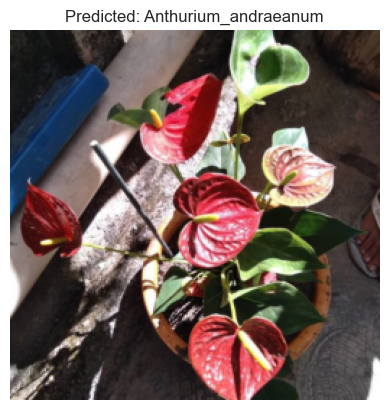

Real class name: Anthurium_andraeanum


In [54]:
# Selecting a random image from the test dataset.
random_idx = random.randint(0, len(image_datasets['test']) - 1)
image, label = image_datasets['test'][random_idx]

# Converting the PyTorch tensor image back to PIL format for visualization.
image_show = transforms.ToPILImage()(image)

# Preprocessing the image for the model. This involves adding an additional dimension to mimic a batch size of 1,
# as models expect inputs in batches.
image = image.unsqueeze(0)  # Adding batch dimension.
image = Variable(image.to(device))  # Transferring the image to the device (GPU or CPU).

# Ensuring the model is in evaluation mode. This is crucial for certain layers like dropout and batch normalization
# to behave correctly during inference.
model.eval()

# Obtaining the model's prediction. The model outputs logits, and the highest scoring class is taken as the prediction.
outputs = model(image)
_, preds = torch.max(outputs, 1)

# Retrieving the predicted class name using the class index.
predicted_class = image_datasets['test'].classes[preds[0]]

# Displaying the image along with the model's prediction.
plt.imshow(image_show)
plt.title(f"Predicted: {species_names[predicted_class]}")  # Displaying the predicted species name.
plt.axis('off')  # Hiding axes for cleaner visualization.
plt.show()

# Retrieving the actual class name using the label index provided with the image.
class_id_str = image_datasets['test'].classes[label]
real_name = species_names[class_id_str]

# Printing the actual class name for comparison.
print(f"Real class name: {real_name}")

28542